Abalone.




In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
# Загрузка данных
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv")

In [3]:
# Размеры таблицы
print(f"Размер таблицы: {df.shape}")

Размер таблицы: (12330, 18)


In [4]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,NaN,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
# Основные числовые характеристики
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3348,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [6]:
# Информация о типах данных и пропусках
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14

Administrative - Количество посещенных административных страниц (int64)

Administrative_Duration - Общее время на административных страницах, в секундах (float64)

Informational - Количество посещенных информационных страниц (int64)

Informational_Duration - Общее время на информационных страницах, в секундах (float64)

ProductRelated - Количество посещенных страниц, связанных с товарами (int64)

ProductRelated_Duration - Общее время на страницах, связанных с товарами, в секундах (float64)

BounceRates - Показатель отказов (доля посетителей, ушедших с первой же страницы) для страниц в сессии (float64)

ExitRates - Показатель выходов (доля сессий, завершившихся на данной странице) для страниц в сессии (float64)

PageValues - Средняя ценность страницы, отражающая ее вклад в совершение покупки (float64)

SpecialDay - Близость даты визита к специальному дню или празднику (float64)

Month - Месяц, в котором состоялась сессия (object)

OperatingSystems - Код операционной системы пользователя (int64)

Browser - Код браузера пользователя (int64)

Region - Код географического региона пользователя (int64)

TrafficType - Код типа трафика, по которому пользователь пришел на сайт (int64)

VisitorType - Тип посетителя (новый, вернувшийся или другой) (object)

Weekend - Является ли день визита выходным (bool)

Revenue - Завершилась ли сессия покупкой (bool)

In [7]:
# Количество пропусков
print("\nКоличество пропусков в столбцах:")
print(df.isnull().sum())


Количество пропусков в столбцах:
Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    491
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64


 значения пропущены только в 3 столбцах: ProductRelated_Duration ( ~ 4.0%), Informational_Duration (~ 1.6%) и ExitRates (~ 0.8%), при этом целевая переменная Revenue и остальные признаки заполнены полностью.

 Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой (ExitRates)

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать) (Informational_Duration, ProductRelated_Duration)

Выбираем медиану, так как она устойчива к выбросам

In [9]:
# Удаляем строки с пропусками в ExitRates
df = df.dropna(subset=['ExitRates'])

# Обработка пропусков медианой для переменных Informational_Duration, ProductRelated_Duration
df.fillna({
    'Informational_Duration': df['Informational_Duration'].median(),
    'ProductRelated_Duration': df['ProductRelated_Duration'].median()
}, inplace=True)



In [12]:
# Дубликаты
df.duplicated().sum()

np.int64(0)

In [11]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

print(f"Размер таблицы после удаления дубликатов: {df.shape}")

Размер таблицы после удаления дубликатов: (12119, 18)


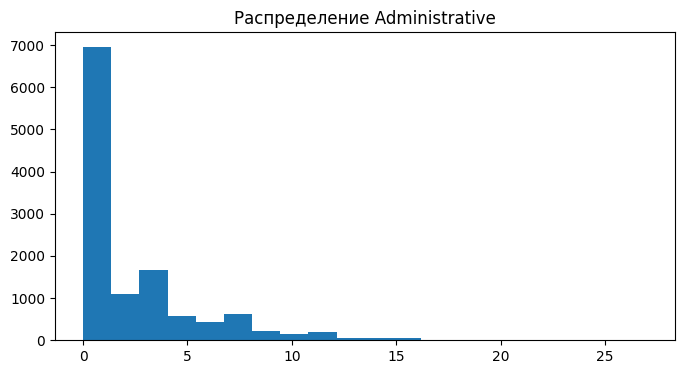

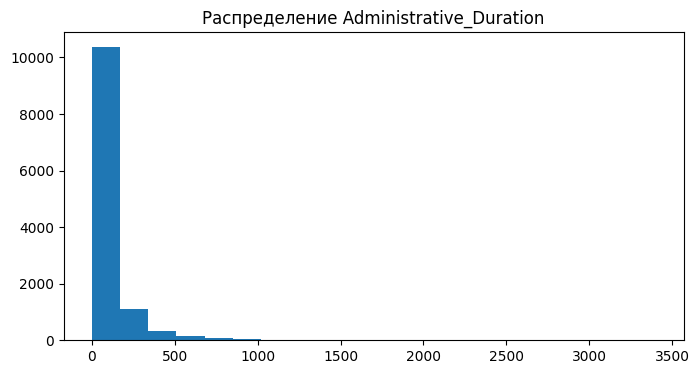

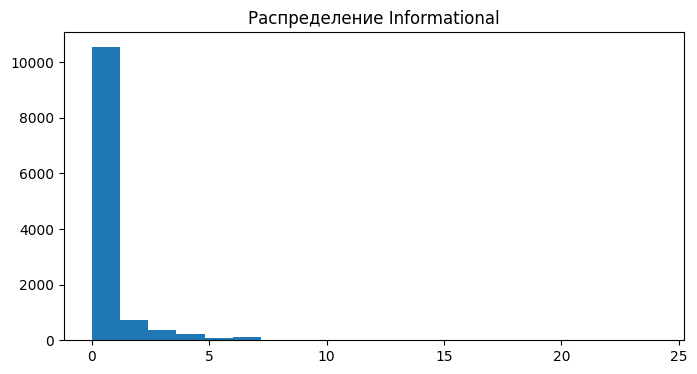

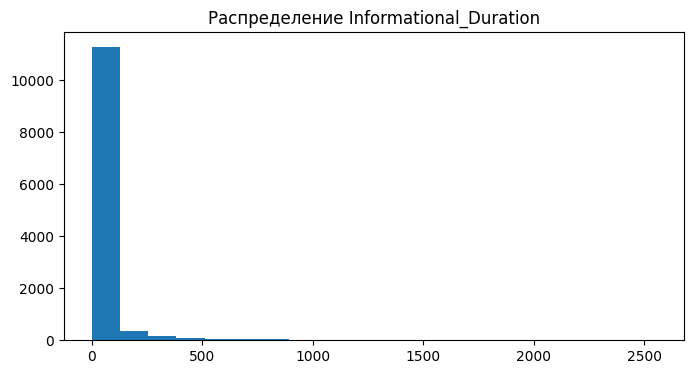

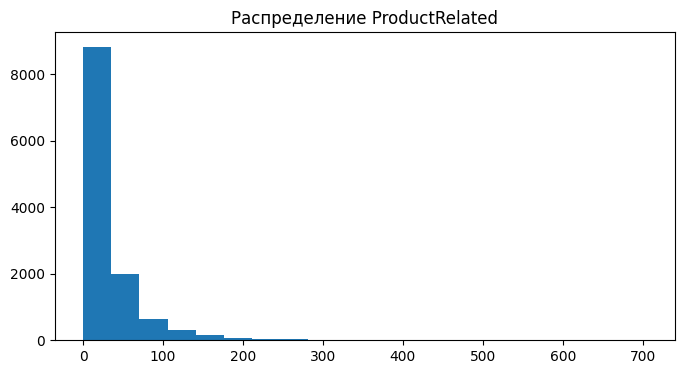

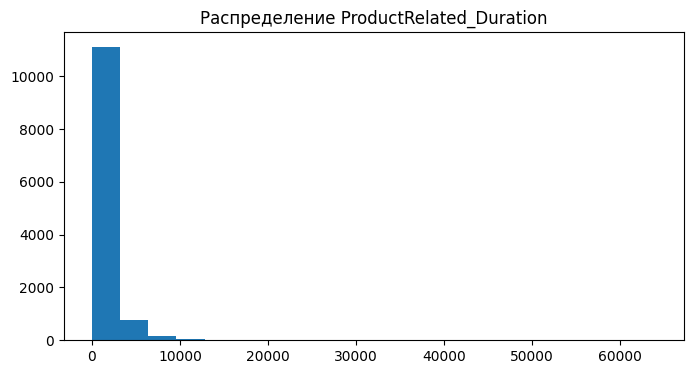

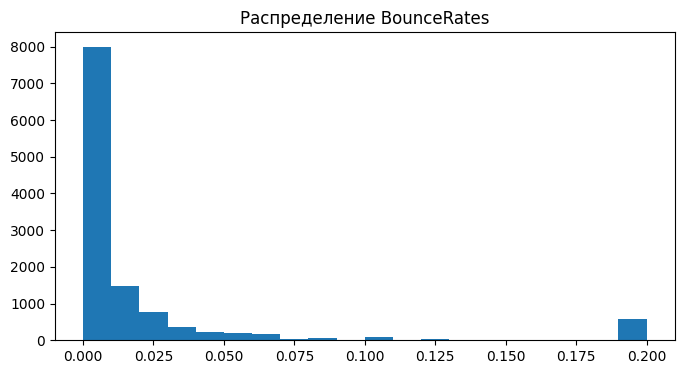

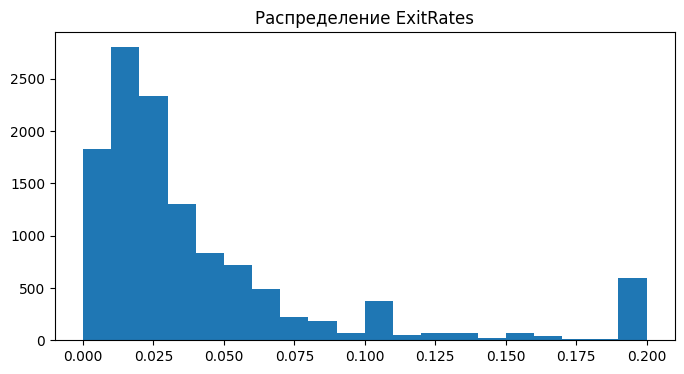

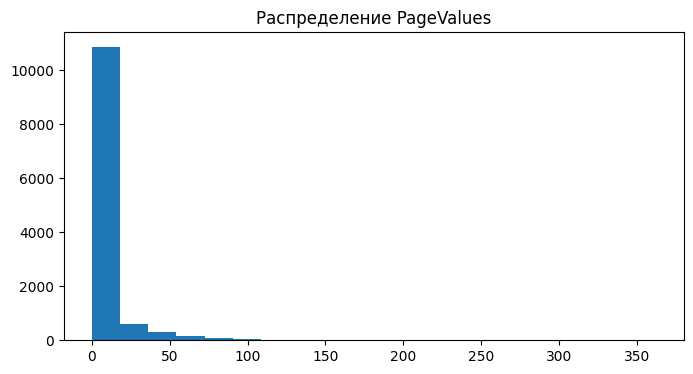

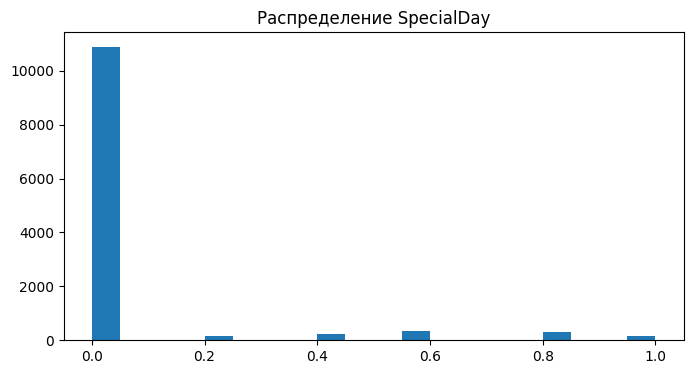

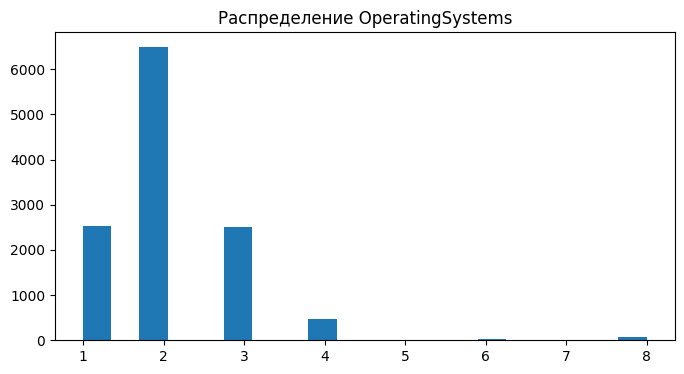

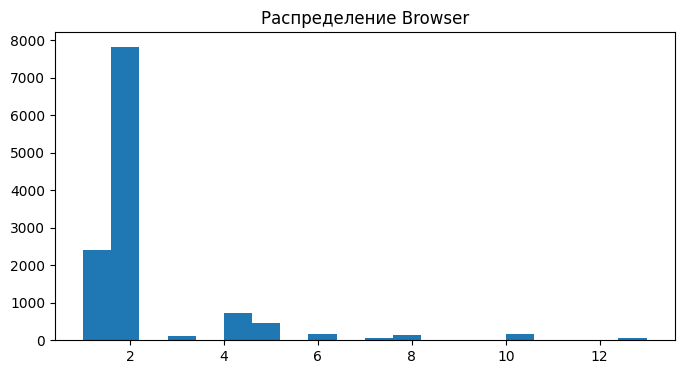

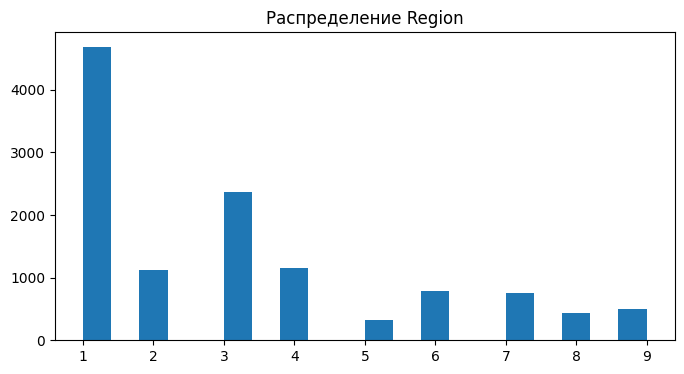

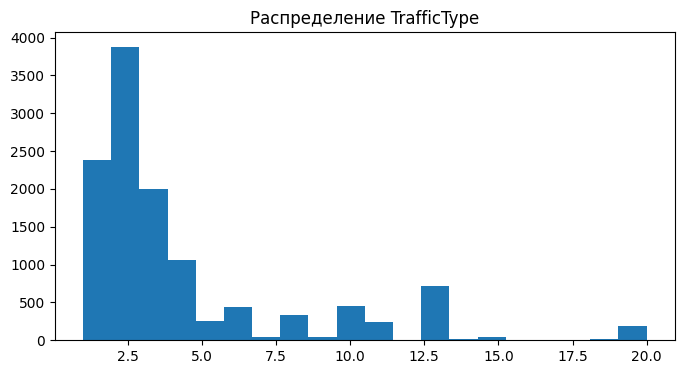

In [13]:
# Анализ распределений числовых признаков
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20);
    plt.title(f"Распределение {col}")
    plt.show()

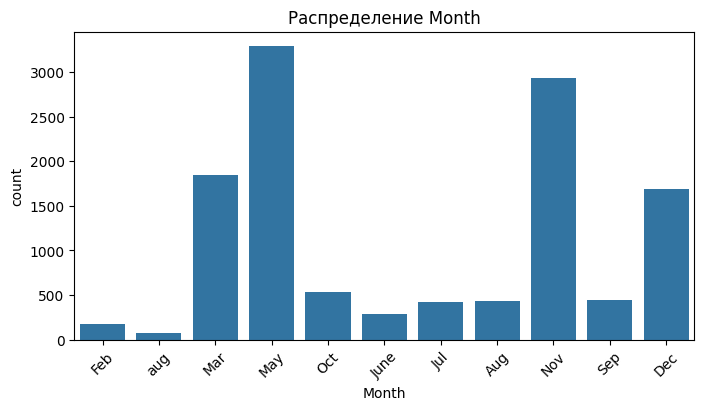

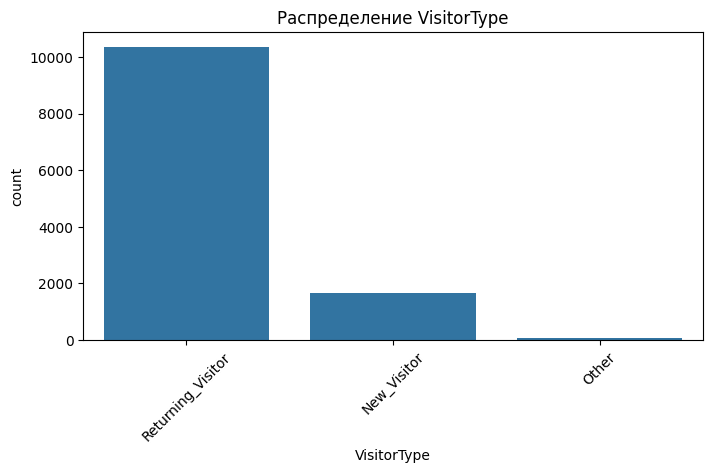

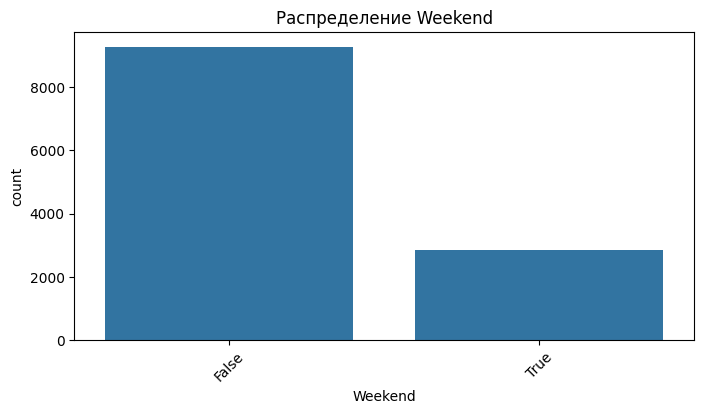

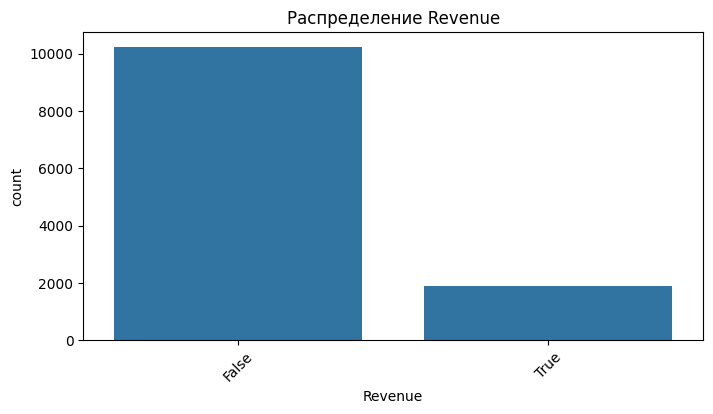

In [ ]:
# Анализ категориальных признаков
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Распределение {col}")
    plt.xticks(rotation=45)
    plt.show()

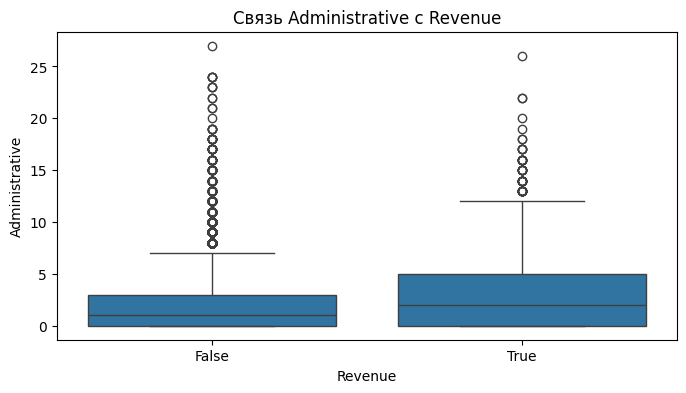

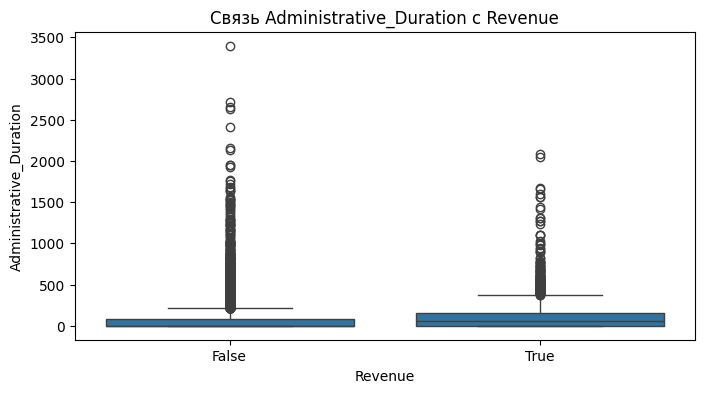

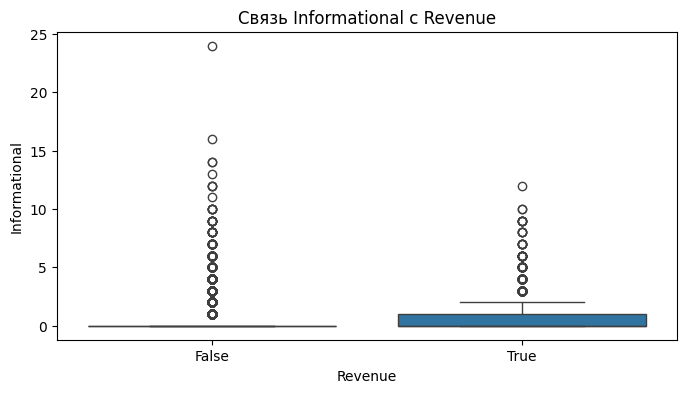

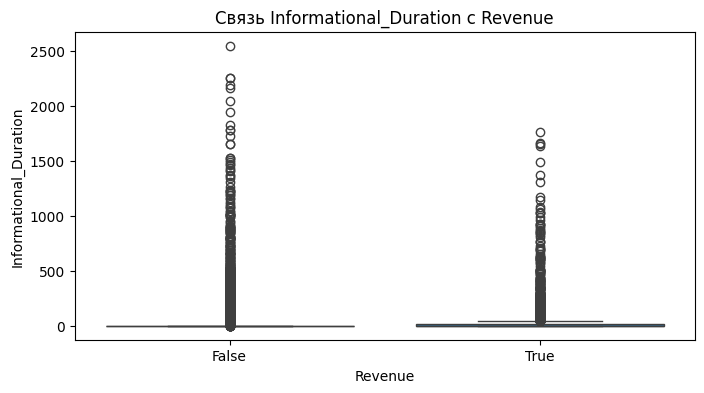

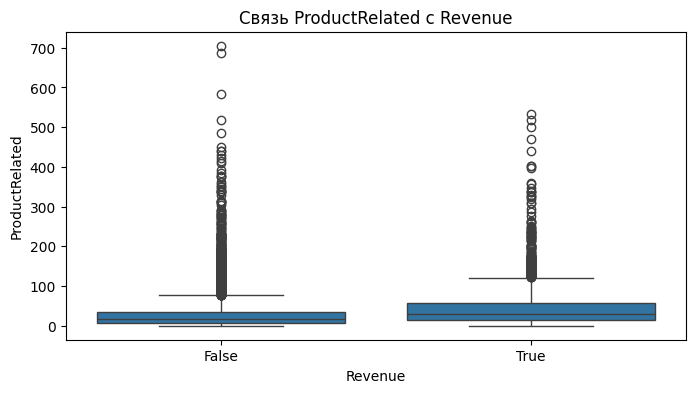

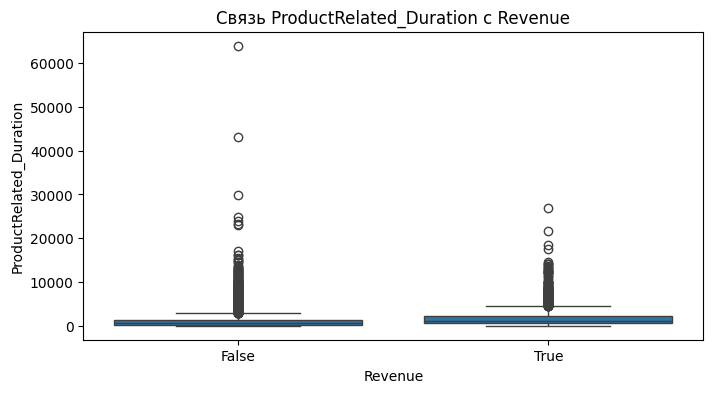

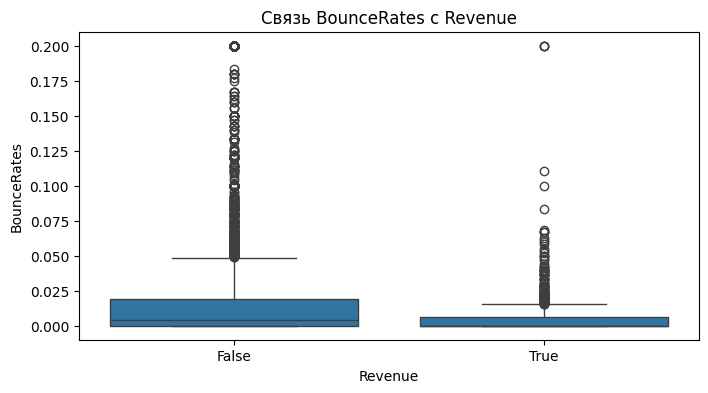

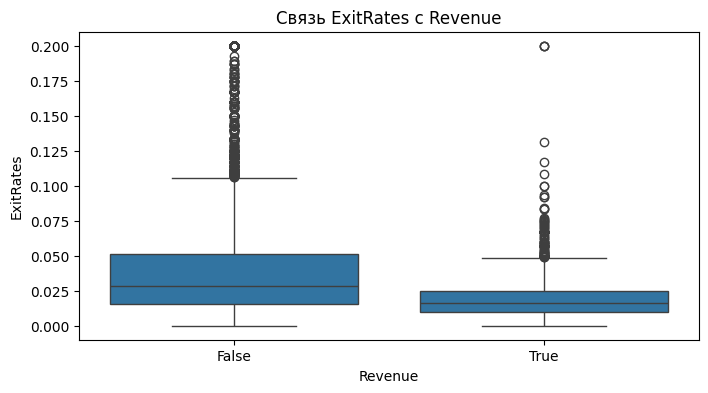

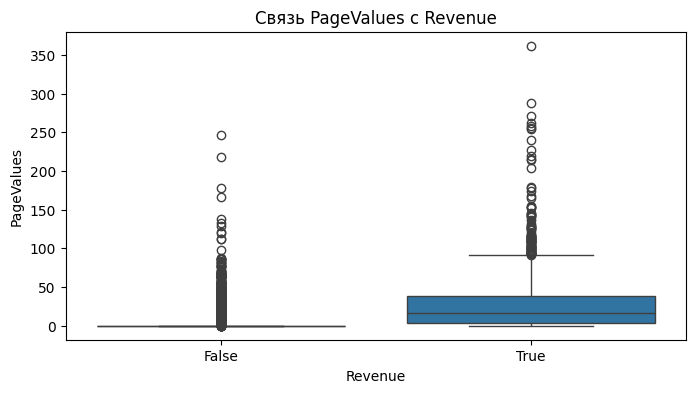

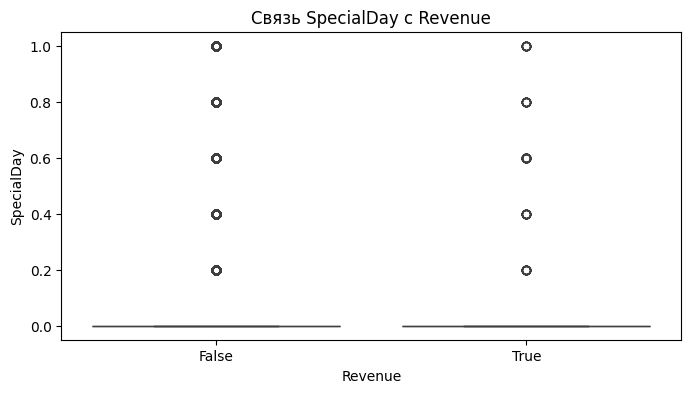

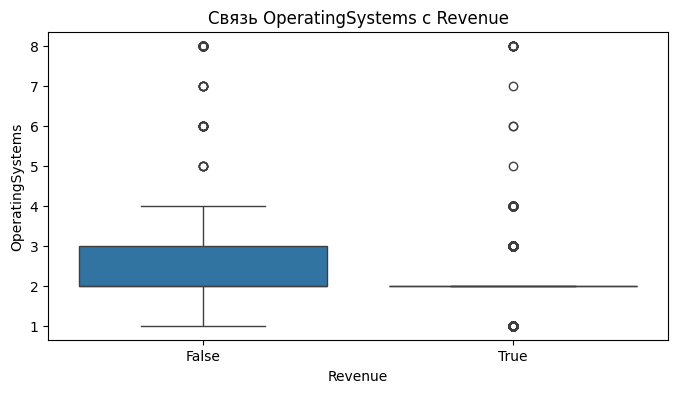

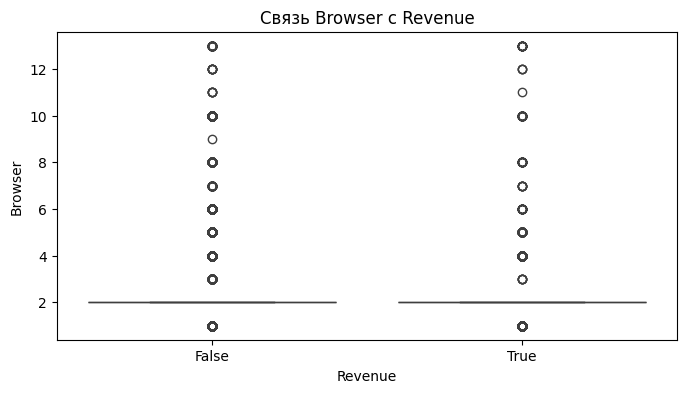

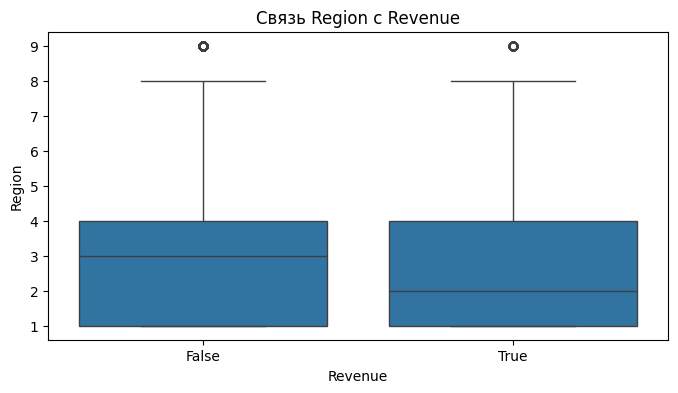

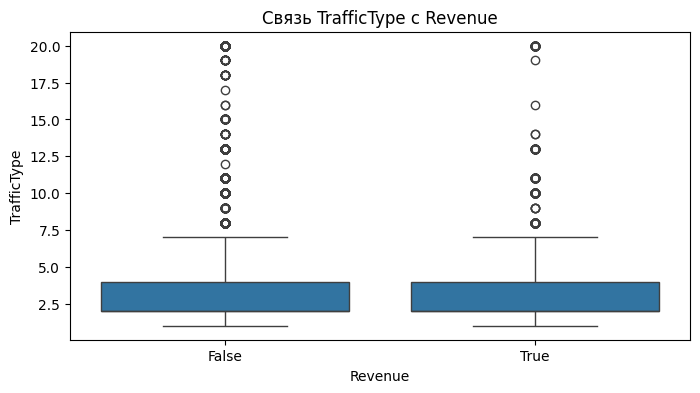

In [14]:
# Связь с целевой переменной (Revenue)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Revenue', y=col)
    plt.title(f"Связь {col} с Revenue")
    plt.show()

In [15]:
df.groupby('Month')['Revenue'].mean().sort_values(ascending=False)


,Revenue
Month,
Nov,0.252725
aug,0.242857
Oct,0.213755
Sep,0.192744
Aug,0.172897
Jul,0.150943
Dec,0.125148
May,0.108577
Mar,0.102814



   - Сильный дисбаланс классов: менее 20% процентов сессий заканчиваются покупкой
   - Скошенные распределения большинства числовых признаков
   - Пик покупок в ноябре
   - Browser, SpecialDay очень слабая связь с переменной


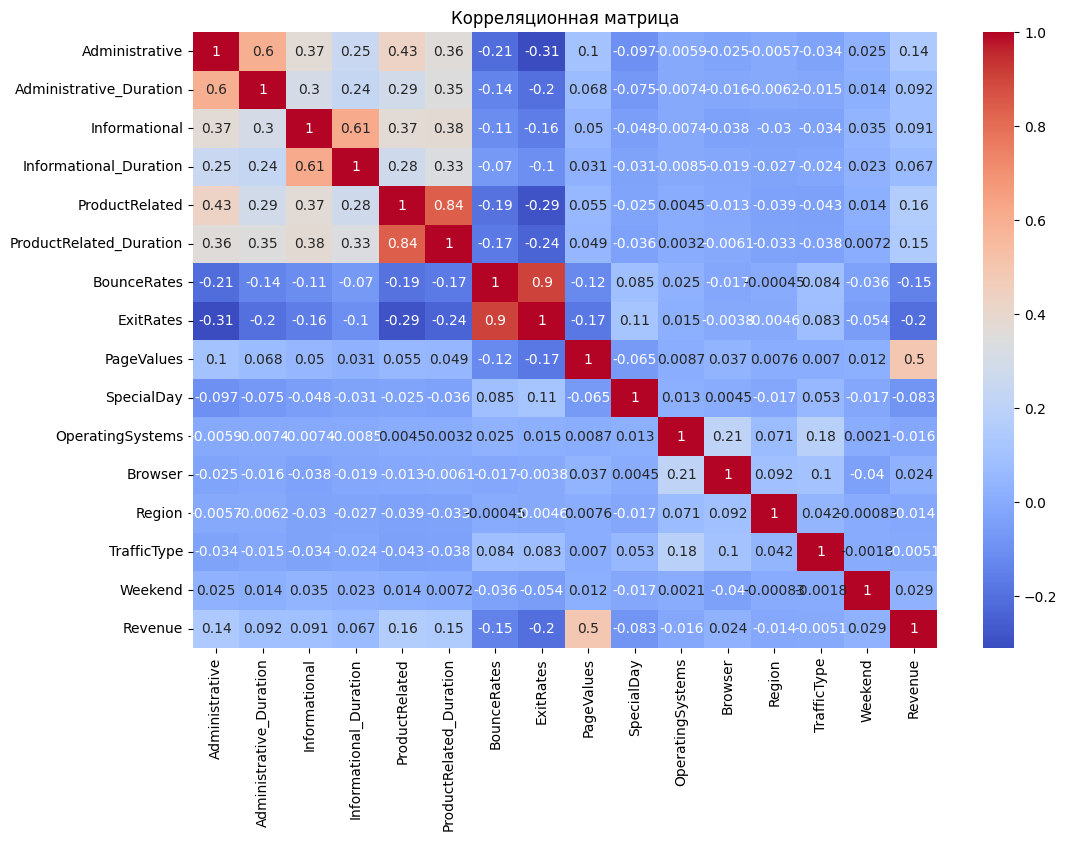

χ²:
      Category1    Category2 Is correlated
0        Month  VisitorType           Yes
1  VisitorType        Month           Yes 

ANOVA:
        Category                Numerical Is correlated
0         Month           Administrative           Yes
1         Month  Administrative_Duration           Yes
2         Month            Informational           Yes
3         Month   Informational_Duration           Yes
4         Month           ProductRelated           Yes
5         Month  ProductRelated_Duration           Yes
6         Month              BounceRates           Yes
7         Month                ExitRates           Yes
8         Month               PageValues           Yes
9         Month               SpecialDay           Yes
10        Month         OperatingSystems           Yes
11        Month                  Browser           Yes
12        Month                   Region           Yes
13        Month              TrafficType           Yes
14        Month                  W

In [16]:
# Корреляционная матрица для числовых признаков
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

# Тест χ² для категориальных признаков
from scipy.stats import chi2_contingency

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        # Проверяем, что обе переменные категориальные
        if df[c1].dtype == 'object' and df[c2].dtype == 'object':
            # Пропускаем сравнение переменной с самой собой
            if c1 != c2:
                contingency_table = pd.crosstab(df[c1], df[c2])
                chi2, p_value, _, _ = chi2_contingency(contingency_table)

                Data.append({
                    'Category1': c1,
                    'Category2': c2,
                    'Is correlated': 'Yes' if p_value < 0.05 else 'No',
                     })

ChiSquareRes = pd.DataFrame.from_dict(Data)
print("χ²:\n",ChiSquareRes, "\n")

# ANOVA для числовых - категориальных признаков
from scipy.stats import f_oneway
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
print("ANOVA:\n",AnovaRes, "\n")

In [17]:
print(f"{ df['Revenue'].value_counts()}")

Revenue
False    10233
True      1886
Name: count, dtype: int64


Целевая переменная Revenue является бинарной (0 или 1), где 1 означает, что покупка совершена, а 0 — что покупка не совершена.

In [18]:
import  time
# Увеличение размера данных до 1,000,000 строк
original_rows = df.shape[0]
multiplier = int(np.ceil(1_000_000 / original_rows))
large_df = pd.concat([df] * multiplier, ignore_index=True)
large_df = large_df.iloc[:1_000_000]  # Обрезаем до ровно 1,000,000 строк

# Сохраняем увеличенный датасет
large_df.to_csv('large_online_shoppers.csv', index=False)

print(f"Создан увеличенный датасет размером {large_df.shape[0]} строк")

# Сравнение скорости загрузки данных
print("\n--- Сравнение скорости загрузки данных ---")
# Pandas
start_time = time.time()
pandas_df = pd.read_csv('large_online_shoppers.csv')
pandas_load_time = time.time() - start_time
print(f"Pandas: {pandas_load_time:.4f} секунд")

# Polars
start_time = time.time()
polars_df = pl.read_csv('large_online_shoppers.csv')
polars_load_time = time.time() - start_time
print(f"Polars: {polars_load_time:.4f} секунд")
print(f"Ускорение: {pandas_load_time / polars_load_time:.2f}x")

# Сравнение скорости фильтрации данных
print("\n--- Сравнение скорости фильтрации данных ---")
# Pandas
start_time = time.time()
filtered_pandas = pandas_df[(pandas_df['BounceRates'] < 0.2) & (pandas_df['ExitRates'] < 0.2)]
pandas_filter_time = time.time() - start_time
print(f"Pandas: {pandas_filter_time:.4f} секунд")

# Polars
start_time = time.time()
filtered_polars = polars_df.filter((pl.col('BounceRates') < 0.2) & (pl.col('ExitRates') < 0.2))
polars_filter_time = time.time() - start_time
print(f"Polars: {polars_filter_time:.4f} секунд")
print(f"Ускорение: {pandas_filter_time / polars_filter_time:.2f}")

# Сравнение скорости агрегации данных
print("\n--- Сравнение скорости агрегации данных ---")
# Pandas
start_time = time.time()
agg_pandas = pandas_df.groupby(['Month', 'VisitorType']).agg({
    'BounceRates': 'mean',
    'ExitRates': 'mean',
    'PageValues': 'mean',
    'Revenue': 'sum'
}).reset_index()
pandas_agg_time = time.time() - start_time
print(f"Pandas: {pandas_agg_time:.4f} секунд")

# Polars
start_time = time.time()
agg_polars = polars_df.group_by(['Month', 'VisitorType']).agg([
    pl.col('BounceRates').mean(),
    pl.col('ExitRates').mean(),
    pl.col('PageValues').mean(),
    pl.col('Revenue').sum()
])
polars_agg_time = time.time() - start_time
print(f"Polars: {polars_agg_time:.4f} секунд")
print(f"Ускорение: {pandas_agg_time / polars_agg_time:.2f}")



Создан увеличенный датасет размером 1000000 строк

--- Сравнение скорости загрузки данных ---
Pandas: 2.0891 секунд
Polars: 0.9957 секунд
Ускорение: 2.10x

--- Сравнение скорости фильтрации данных ---
Pandas: 0.1004 секунд
Polars: 0.2357 секунд
Ускорение: 0.43

--- Сравнение скорости агрегации данных ---
Pandas: 0.2297 секунд
Polars: 0.1566 секунд
Ускорение: 1.47
